In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

In [ ]:
# Loding the dataset
BTC = pd.read_csv(f"/content/drive/MyDrive/Intel SIP/Crypto_Guides/BTC.csv")
ETH = pd.read_csv(f"/content/drive/MyDrive/Intel SIP/Crypto_Guides/ETH.csv")
LTC = pd.read_csv(f"/content/drive/MyDrive/Intel SIP/Crypto_Guides/LTC.csv")

In [ ]:
close_prices = BTC['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.5)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 32, epochs=2)

Epoch 1/2
108/108 [==============================] - 20s 100ms/step - loss: 0.0132
Epoch 2/2
108/108 [==============================] - 11s 97ms/step - loss: 3.7507e-04


#BTC

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

110/110 [==============================] - 5s 34ms/step


33.86362500890272

<ipython-input-8-33f3d548674b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


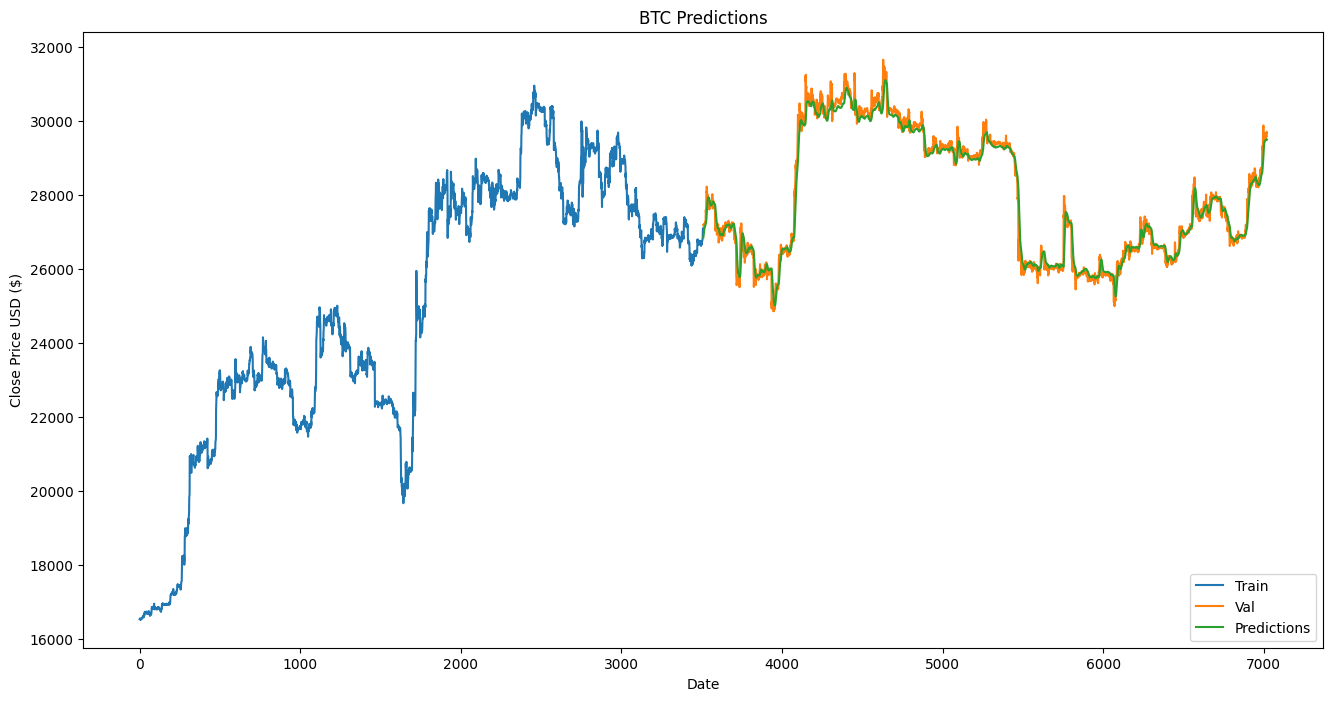

In [ ]:
data = BTC.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('BTC Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#ETH

In [ ]:
close_prices_ETH = ETH['Close']
values_ETH = close_prices_ETH.values
training_data_len_ETH = math.ceil(len(values_ETH)* 0.5)
scaled_data_ETH = scaler.fit_transform(values_ETH.reshape(-1,1))
test_data_ETH = scaled_data_ETH[training_data_len_ETH-60: , : ]
x_test_ETH = []
y_test_ETH = values_ETH[training_data_len_ETH:]

for i in range(60, len(test_data_ETH)):
  x_test_ETH.append(test_data_ETH[i-60:i, 0])

x_test_ETH = np.array(x_test_ETH)
x_test_ETH = np.reshape(x_test_ETH, (x_test_ETH.shape[0], x_test_ETH.shape[1], 1))

In [ ]:
predictions = model.predict(x_test_ETH)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test_ETH)**2)
rmse

110/110 [==============================] - 4s 32ms/step


3.045822692140745

<ipython-input-11-9912e7a1c1fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


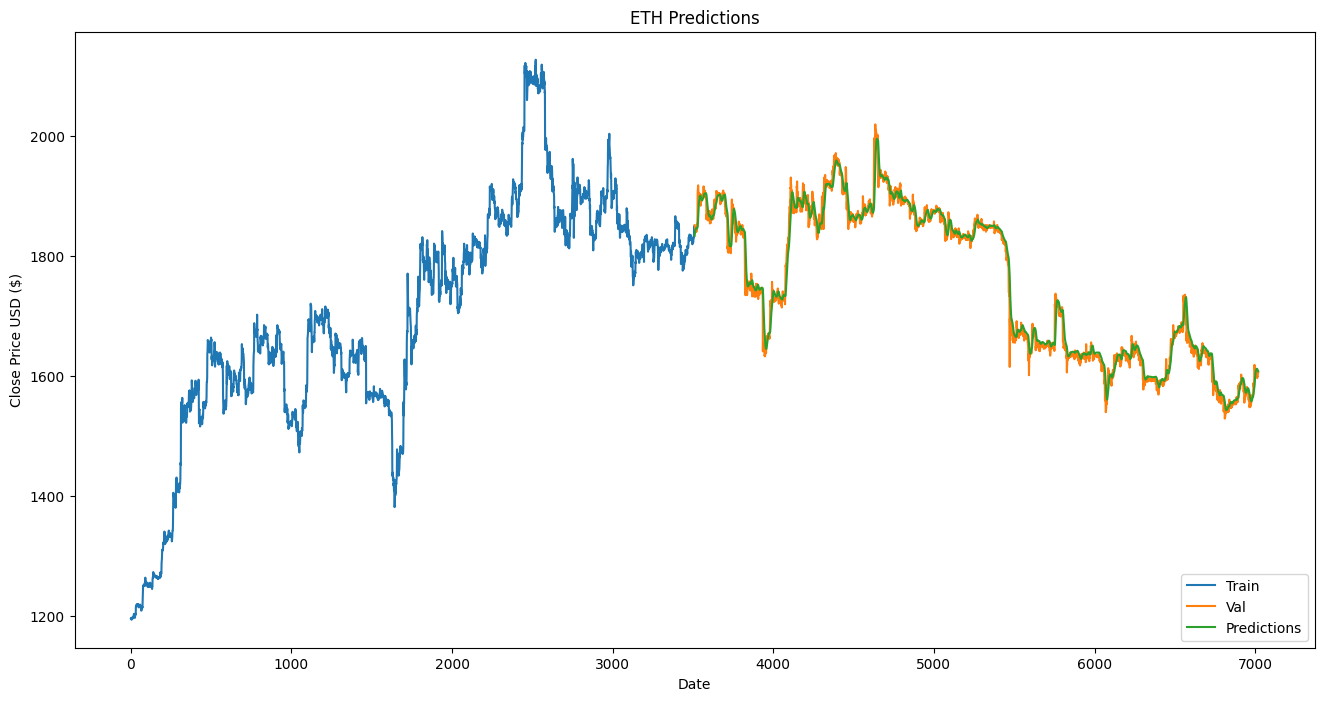

In [ ]:
data = ETH.filter(['Close'])
train = data[:training_data_len_ETH]
validation = data[training_data_len_ETH:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('ETH Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#LTC

In [ ]:
close_prices_LTC = LTC['Close']
values_LTC = close_prices_LTC.values
training_data_len_LTC = math.ceil(len(values_LTC)* 0.5)
scaled_data_LTC = scaler.fit_transform(values_LTC.reshape(-1,1))
test_data_LTC = scaled_data_LTC[training_data_len_LTC-60: , : ]
x_test_LTC = []
y_test_LTC = values_LTC[training_data_len_LTC:]

for i in range(60, len(test_data_LTC)):
  x_test_LTC.append(test_data_LTC[i-60:i, 0])

x_test_LTC = np.array(x_test_LTC)
x_test_LTC = np.reshape(x_test_LTC, (x_test_LTC.shape[0], x_test_LTC.shape[1], 1))

In [ ]:
predictions = model.predict(x_test_LTC)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test_LTC)**2)
rmse

109/109 [==============================] - 3s 31ms/step


0.15101153015331015

<ipython-input-14-623d40ee4277>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


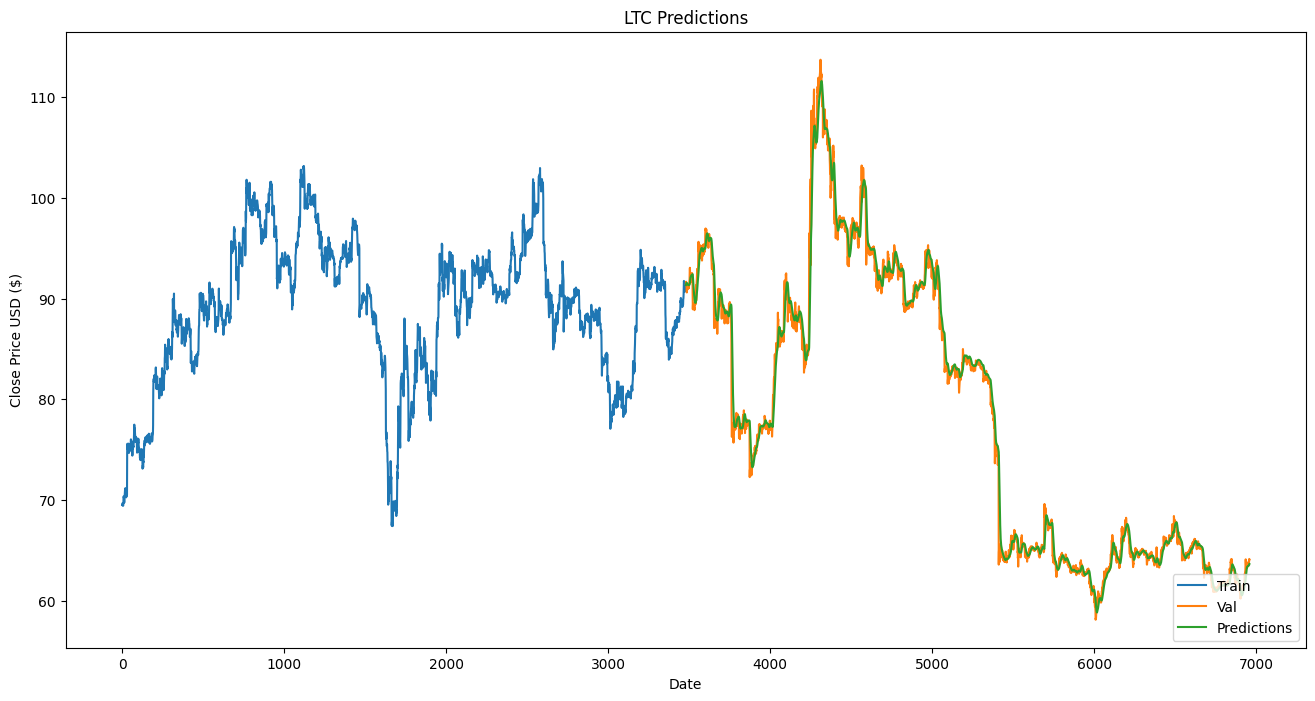

In [ ]:
data = LTC.filter(['Close'])
train = data[:training_data_len_LTC]
validation = data[training_data_len_LTC:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('LTC Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#All coins (with an equal number of each coin)

In [ ]:
values_mix = []
for i in [BTC,LTC,ETH]:
  for j in range(1600):
    values_mix.append(i['Close'][j])
mix = pd.DataFrame(values_mix,columns=['Close'])


In [ ]:
close_prices_mix = mix['Close']
values_mix = close_prices_mix.values
training_data_len_mix = math.ceil(len(values_mix)* 0.5)
scaled_data_mix = scaler.fit_transform(values_mix.reshape(-1,1))
test_data_mix = scaled_data_mix[training_data_len_mix-60: , : ]
x_test_mix = []
y_test_mix = values_mix[training_data_len_mix:]

for i in range(60, len(test_data_mix)):
  x_test_mix.append(test_data_mix[i-60:i, 0])

x_test_mix = np.array(x_test_mix)
x_test_mix = np.reshape(x_test_mix, (x_test_mix.shape[0], x_test_mix.shape[1], 1))

In [ ]:
predictions = model.predict(x_test_mix)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test_mix)**2)
rmse

75/75 [==============================] - 2s 31ms/step


47.06120620007179

#All coins (with a random selection of each coin)

In [ ]:
values_ran = []
import random
symbol = [BTC,LTC,ETH]
for j in range(5000):
  ran = random.randint(0,2)
  i = symbol[ran]
  values_ran.append(i['Close'][j])
ran = pd.DataFrame(values_ran,columns=['Close'])


In [ ]:
close_prices_ran = ran['Close']
values_ran = close_prices_ran.values
training_data_len_ran = math.ceil(len(values_ran)* 0.5)
scaled_data_ran = scaler.fit_transform(values_ran.reshape(-1,1))
test_data_ran = scaled_data_ran[training_data_len_ran-60: , : ]
x_test_ran = []
y_test_ran = values_ran[training_data_len_ran:]

for i in range(60, len(test_data_ran)):
  x_test_ran.append(test_data_ran[i-60:i, 0])

x_test_ran = np.array(x_test_ran)
x_test_ran = np.reshape(x_test_ran, (x_test_ran.shape[0], x_test_ran.shape[1], 1))

In [ ]:
predictions = model.predict(x_test_ran)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test_ran)**2)
rmse

79/79 [==============================] - 3s 38ms/step


125.88638146484362


##RMSE/Loss Comparision
---
Bitcoin only ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀=== ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀33.86362500890272

---

Ethereum only ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀=== ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀3.045822692140745

---

Litecoin only ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀=== ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀0.15101153015331015

---

All coins (with an equal number of each coin)⠀⠀⠀ === ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀47.06120620007179

---

All coins (with a random selection of each coin )⠀ === ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀125.88638146484362






# Conclusion

###All the 3 datasets containing purely one symbol have very low RMSE (Root Mean Sqaured Error).

#####**(Lower RMSE is better)**

###The dataset containing equal amount of coin data had the 2nd highest RMSE.

###The dataset containing random amount of coin data had the highest RMSE.

##**We can conclude that we should only do predictions on datasets containing only one coin data.**



